In [1]:
import nest
import numpy as np
import pandas as pd


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: master@66255beb5
 Built: Sep 28 2022 14:26:52

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.Install('stepcurrentmodule')


Sep 28 23:09:25 Install [Info]: 
    loaded module Step Current Module


In [23]:
model = 'aeif_cond_exp'

In [24]:
nest.ResetKernel()

In [25]:
I_step = 20*np.array([10., -20., 30., -40., 50.])
t_step = np.array([10., 30., 40., 45., 50.])

In [26]:
n = nest.Create(f'{model}_sc', params={'amplitude_values': I_step, 
                                           'amplitude_times': t_step})

In [27]:
vm = nest.Create('voltmeter', params={'interval': 0.1})

In [28]:
nest.Connect(vm, n)

`t_step-1` to compensate for transmission delay.

In [29]:
scg = nest.Create('step_current_generator', params={'amplitude_values': I_step, 
                                              'amplitude_times': t_step-1})
nr = nest.Create(model)
nest.Connect(scg, nr)
nest.Connect(vm, nr)

In [30]:
nest.Simulate(100)


Sep 28 23:10:26 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 28 23:10:26 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Not using OpenMP
    Not using MPI

Sep 28 23:10:26 SimulationManager::run [Info]: 
    Simulation finished.


In [31]:
n.set({'amplitude_values': I_step, 'amplitude_times': 100+t_step})

In [32]:
scg.set({'amplitude_values': I_step, 'amplitude_times': 100+t_step-1})

In [33]:
nest.Simulate(100)


Sep 28 23:10:28 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Sep 28 23:10:28 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 100
    Not using OpenMP
    Not using MPI

Sep 28 23:10:28 SimulationManager::run [Info]: 
    Simulation finished.


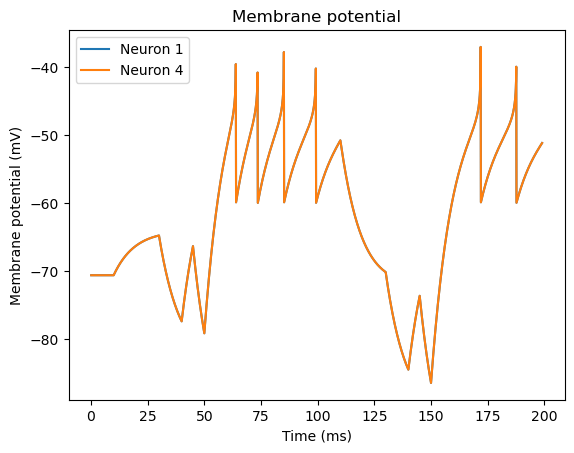

In [34]:
nest.voltage_trace.from_device(vm);

In [35]:
d = pd.DataFrame.from_records(vm.events)

In [36]:
dm = pd.merge(d.loc[d.senders==1], d.loc[d.senders==4], on='times').drop(['senders_x', 'senders_y'], axis=1).set_index('times')

In [37]:
dm.loc[109:111]

,V_m_x,V_m_y
times,,
109.0,-51.361993,-51.361993
109.1,-51.301047,-51.301047
109.2,-51.240284,-51.240284
109.3,-51.179692,-51.179692
109.4,-51.119256,-51.119256
109.5,-51.058963,-51.058963
109.6,-50.998798,-50.998798
109.7,-50.938748,-50.938748
109.8,-50.878797,-50.878797


In [38]:
dm.iloc[-5:]

,V_m_x,V_m_y
times,,
198.6,-51.360625,-51.360625
198.7,-51.308218,-51.308218
198.8,-51.255956,-51.255956
198.9,-51.203830,-51.203830
199.0,-51.151831,-51.151831
